# Santos Buoy - Quality Control Analysis

## Import libs

In [1]:
import numpy as np
import pandas as pd
idx = pd.IndexSlice

from scipy.stats import normaltest

import matplotlib.pyplot as plt
import seaborn as sns

import pnboia_qc.pnboia_limits as pnboia_limits
from pnboia_qc.qc_checks import QCChecks

import pnboia_qc.pnboia_limits_tests as pnboia_limits_tests
from pnboia_qc.lims_gen import *

# %load_ext autoreload
# %autoreload 2

## Load data

In [2]:
data_path = '/home/remobs-dados/PNBOIA/pnboia_qc/data'
os.chdir(data_path)

In [15]:
# Data
buoys_df_raw = pd.read_csv('pnboia_raw_data.csv',parse_dates=True)
buoys_df_raw['Datetime'] = pd.to_datetime(buoys_df_raw['Datetime'])
buoys_df_raw.rename(columns={'humi':'rh', # variables temporarily renamed to match QCChecks limits naming
                            'dewp':'dewpt',
                            'wtmp':'sst',
                            'cvel1':'cspd1',
                            'cvel2':'cspd2',
                            'cvel3':'cspd3',
                            'wvht':'swvht',
                            'wmax':'mxwvht',
                            'dpd':'tp',
                            'mwd':'wvdir',
                            'spred':'wvspread',
                            'arad':'srad'}, inplace=True)
buoys_df_raw.drop(columns=['lat','lon'],inplace=True)

names = {'cf':'cabofrio',
        'cf2':'cabofrio2',
        'fo':'fortaleza',
        'it':'itajai_0',
        'ni':'niteroi',
        'po':'porto_seguro', 
        're':'recife',
        'rg':'rio_grande', 
        'sa':'santos', 
        'vi':'vitoria'}


buoys_df_raw['buoy'] = buoys_df_raw['buoy'].replace(names)
buoys_df_raw.set_index(['buoy','Datetime'], inplace=True)

# Limits from pnboia_limits_tests.py
santos_lims = pnboia_limits_tests.santos

# santos data
santos = buoys_df_raw.loc['santos']

## Statistical Analysis

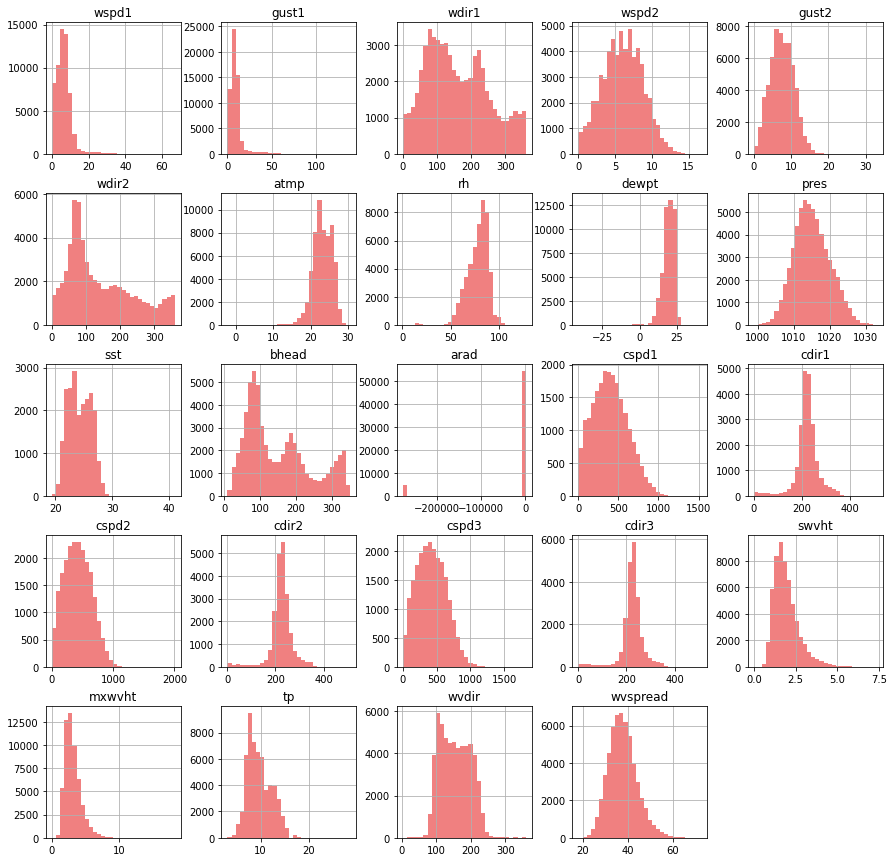

In [12]:
santos.drop(columns='battery').hist(figsize=(15,15),bins=30,color='lightcoral');

In [ ]:
no_outliers = ['pres','wspd2', 'swvht', 'wvdir', 'wvspread']
few_outliers = ['gust2', 'atmp', 'rh', 'dewpt', 'sst', 'cspd1']
many_outliers = ['wspd1', 'gust1', 'srad']

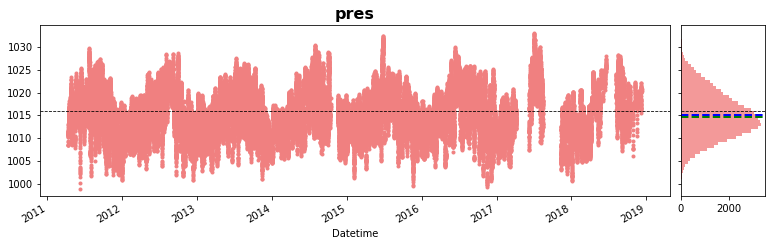

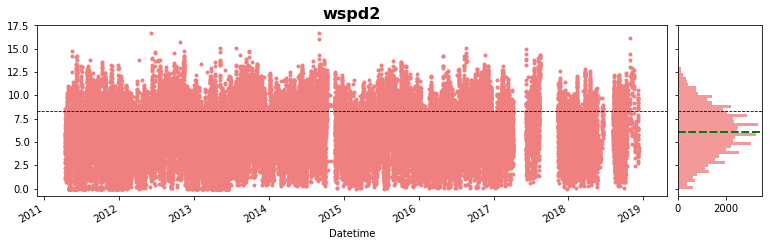

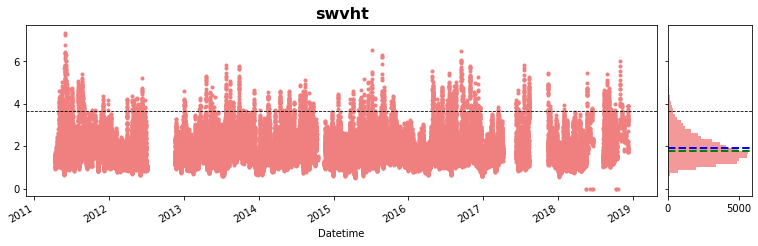

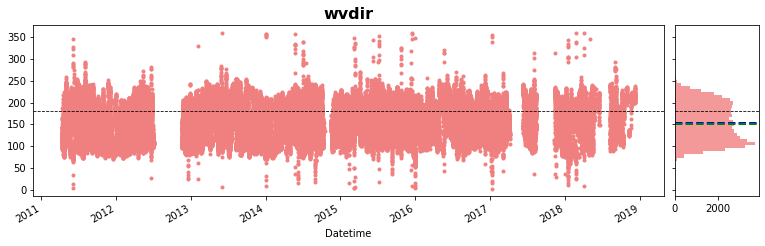

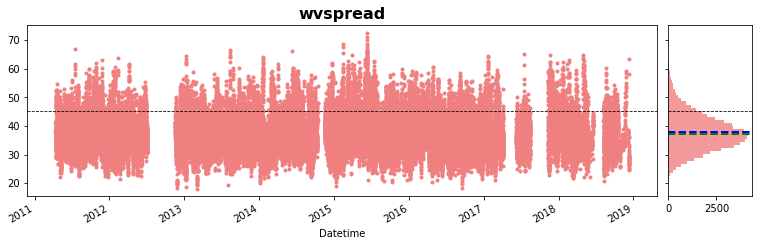

In [25]:
# NO OUTLIERS
for param in no_outliers:
    plot_hist(santos,param)

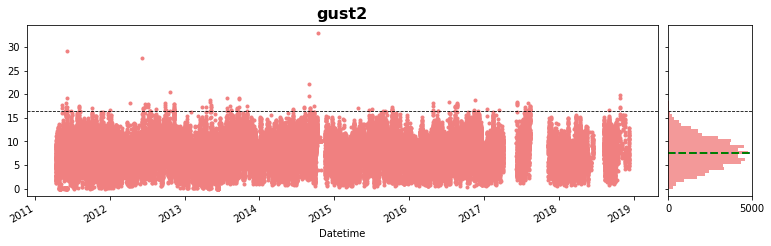

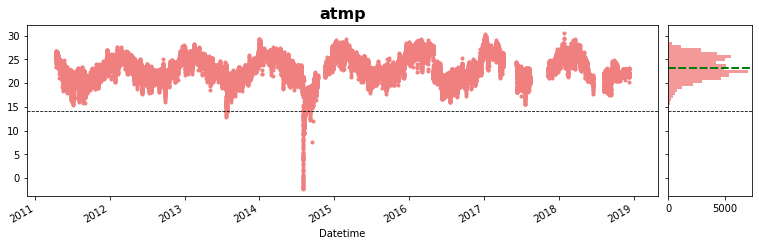

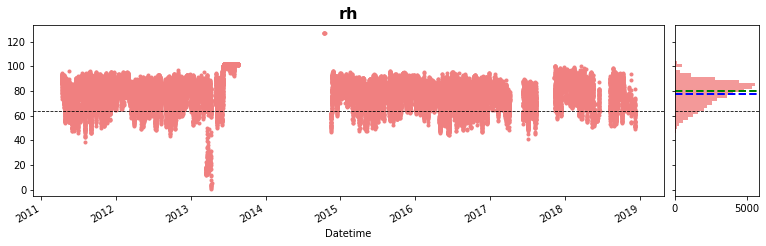

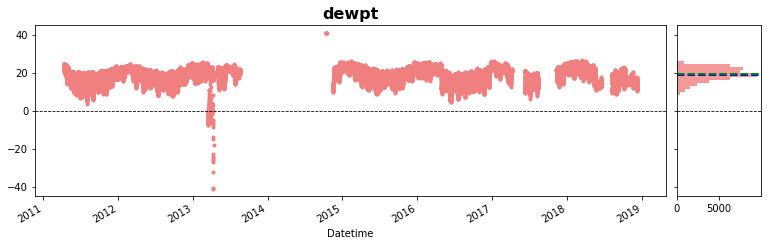

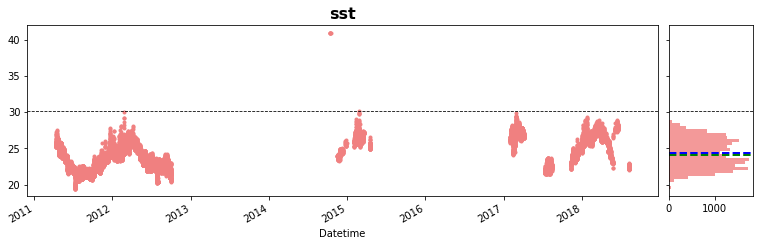

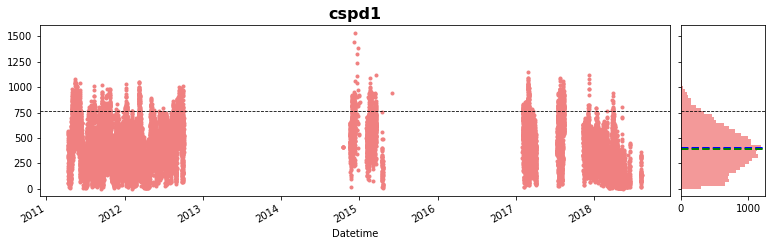

In [26]:
# FEW OUTLIERS
for param in few_outliers:
    plot_hist(santos,param)

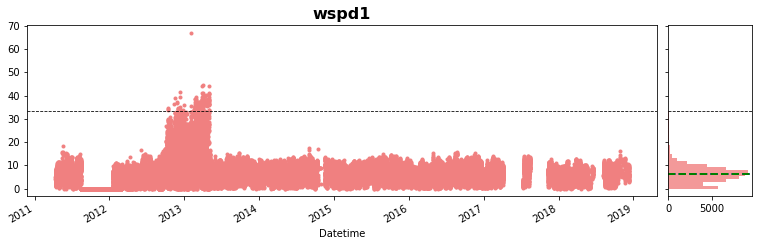

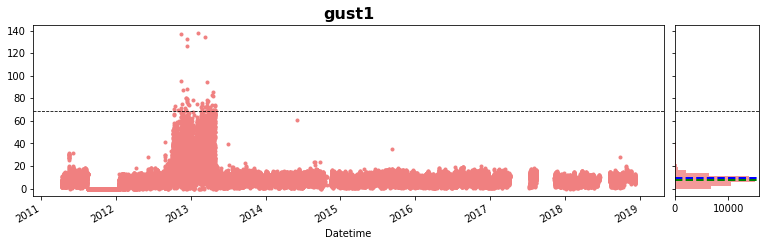

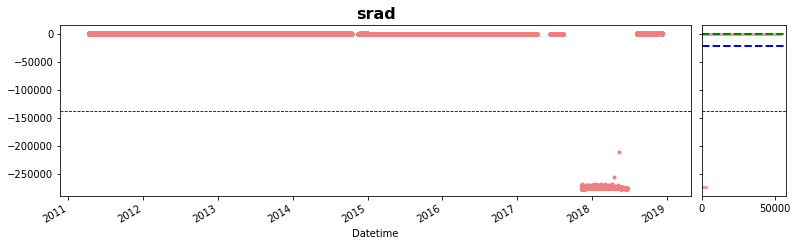

In [29]:
# MANY OUTLIERS
for param in many_outliers:
    plot_hist(santos,param)

## Tests

In [17]:
# Generated lims
santos_out_lims_df_1 = gen_outlier_lim(buoys_df_raw,std_factor=3).loc['santos']

# Generate lims dict
santos_out_lims_dict_1 = manual_outlier_lims('santos',santos_out_lims_df_1)

# filter data with
santos1 = filter_data(data=buoys_df_raw,
                    buoy='santos',
                    limits=santos_lims,
                    range_axys_limits=santos_out_lims_dict_1)

mis_value_check done.
range_check done.
range_check_climate done.


In [18]:
# Generated lims
santos_out_lims_df_2 = gen_outlier_lim(buoys_df_raw,std_factor=2).loc['santos']

# Generate lims dict
santos_out_lims_dict_2 = manual_outlier_lims('santos',santos_out_lims_df_2)

# filter data with
santos2 = filter_data(data=buoys_df_raw,
                    buoy='santos',
                    limits=santos_lims,
                    range_axys_limits=santos_out_lims_dict_2)

mis_value_check done.
range_check done.
range_check_climate done.


In [24]:
santos_out_lims_df_1.loc[no_outliers]

,mean,std,lower_lim,upper_lim
param,,,,
pres,1015.071019,4.954647,1000.207078,1029.934959
wspd2,6.039737,2.686925,0.000000,14.100513
swvht,1.929092,0.741945,0.000000,4.154928
wvdir,153.601190,43.474502,23.177683,284.024698
wvspread,37.779450,6.400744,18.577219,56.981681


In [30]:
santos_out_lims_df_1.loc[few_outliers]

,mean,std,lower_lim,upper_lim
param,,,,
gust2,7.546736,3.147744,0.000000,16.989967
atmp,23.233748,2.588944,15.466916,31.000581
rh,77.815642,10.951423,44.961373,110.669911
dewpt,19.209717,3.889881,7.540073,30.879361
sst,24.308297,1.971575,18.393573,30.223020
cspd1,399.422022,215.076773,0.000000,1044.652341


In [31]:
santos_out_lims_df_1.loc[many_outliers]

,mean,std,lower_lim,upper_lim
param,,,,
wspd1,6.401711,4.475001,0.0,19.826715
gust1,9.017142,8.317955,0.0,33.971008
srad,-21472.748815,73861.498736,0.0,200111.747393


# CHECKPOINT ----------------

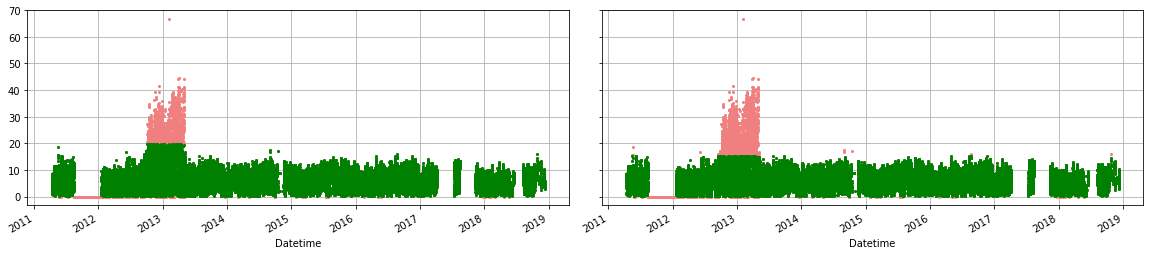

In [47]:
buoy = 'santos'
param = 'wspd1'
fig, ax = plt.subplots(1,2,sharex=True,sharey=True,figsize=(20,4))
plt.subplots_adjust(wspace=0.06)

# test1
buoys_df_raw.loc[buoy,param].plot(color='lightcoral',marker='.',linestyle='none',ms=4,grid=True,ax=ax[0]);
santos1[param].plot(color='green',marker='.',linestyle='none',ms=4,grid=True,ax=ax[0]);

# test2
buoys_df_raw.loc[buoy,param].plot(color='lightcoral',marker='.',linestyle='none',ms=4,grid=True,ax=ax[1]);
santos2[param].plot(color='g',marker='.',linestyle='none',ms=4,grid=True,ax=ax[1]);

In [40]:
santos.index

Index(['2011-04-12 19:00:00', '2011-04-12 20:00:00', '2011-04-12 21:00:00',
       '2011-04-12 22:00:00', '2011-04-12 23:00:00', '2011-04-13 00:00:00',
       '2011-04-13 01:00:00', '2011-04-13 02:00:00', '2011-04-13 03:00:00',
       '2011-04-13 04:00:00',
       ...
       '2018-12-09 00:00:00', '2018-12-09 01:00:00', '2018-12-09 02:00:00',
       '2018-12-09 03:00:00', '2018-12-09 04:00:00', '2018-12-09 05:00:00',
       '2018-12-09 06:00:00', '2018-12-09 07:00:00', '2018-12-09 08:00:00',
       '2018-12-09 09:00:00'],
      dtype='object', name='Datetime', length=59495)

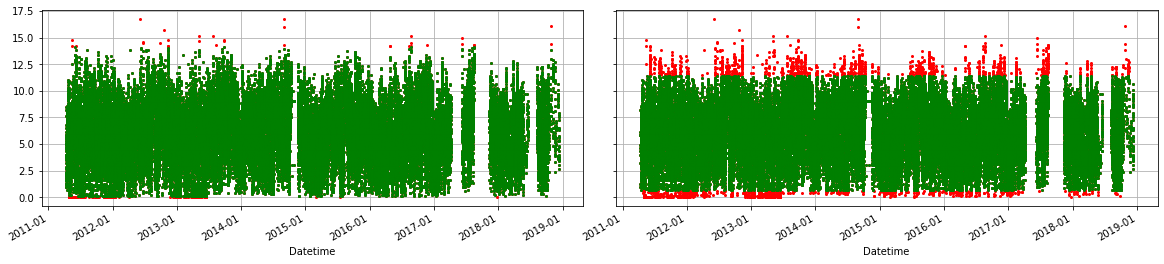

In [65]:
buoy = 'santos'
param = 'wspd2'
fig, ax = plt.subplots(1,2,sharex=True,sharey=True,figsize=(20,4))
plt.subplots_adjust(wspace=0.06)

# test1
buoys_df_raw.loc[buoy,param].plot(color='r',marker='.',linestyle='none',ms=4,grid=True,ax=ax[0]);
santos1[param].plot(color='g',marker='.',linestyle='none',ms=4,grid=True,ax=ax[0]);

# test2
buoys_df_raw.loc[buoy,param].plot(color='r',marker='.',linestyle='none',ms=4,grid=True,ax=ax[1]);
santos2[param].plot(color='g',marker='.',linestyle='none',ms=4,grid=True,ax=ax[1]);

import matplotlib.dates as mdates
dates_format = mdates.DateFormatter('%Y-%m')
ax[0].xaxis.set_major_formatter(dates_format)

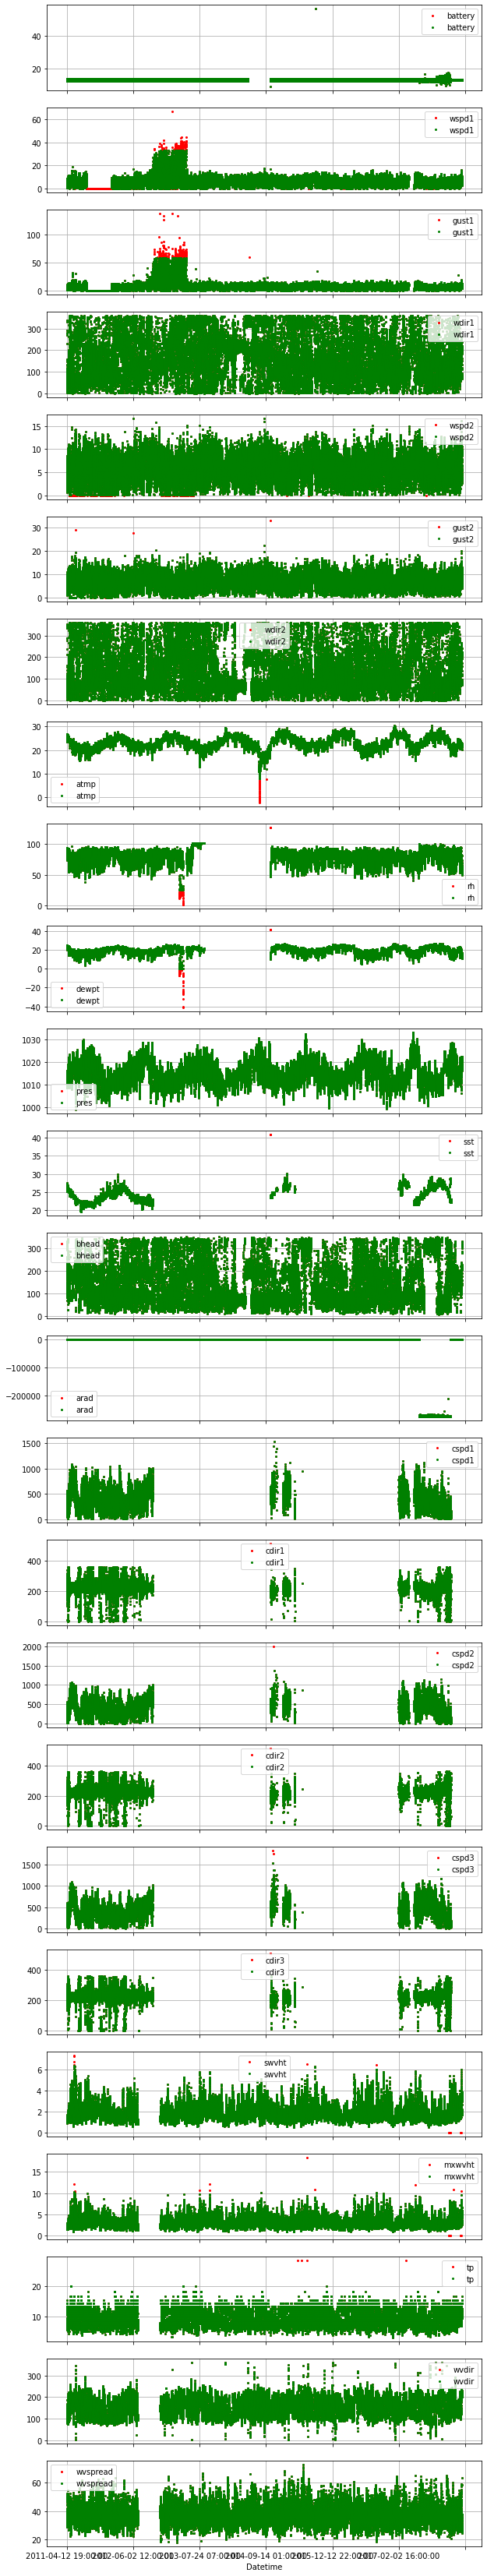

In [13]:
buoy = 'santos'
params_raw = buoys_df_raw.loc[buoy].columns
fig, ax = plt.subplots(len(params_raw),1,sharex=True,figsize=(10,60))
buoys_df_raw.loc[buoy,params_raw].plot(subplots=True,color='r',marker='.',linestyle='none',ms=4,grid=True,ax=ax);
santos.plot(subplots=True,color='g',marker='.',linestyle='none',ms=4,grid=True,ax=ax);

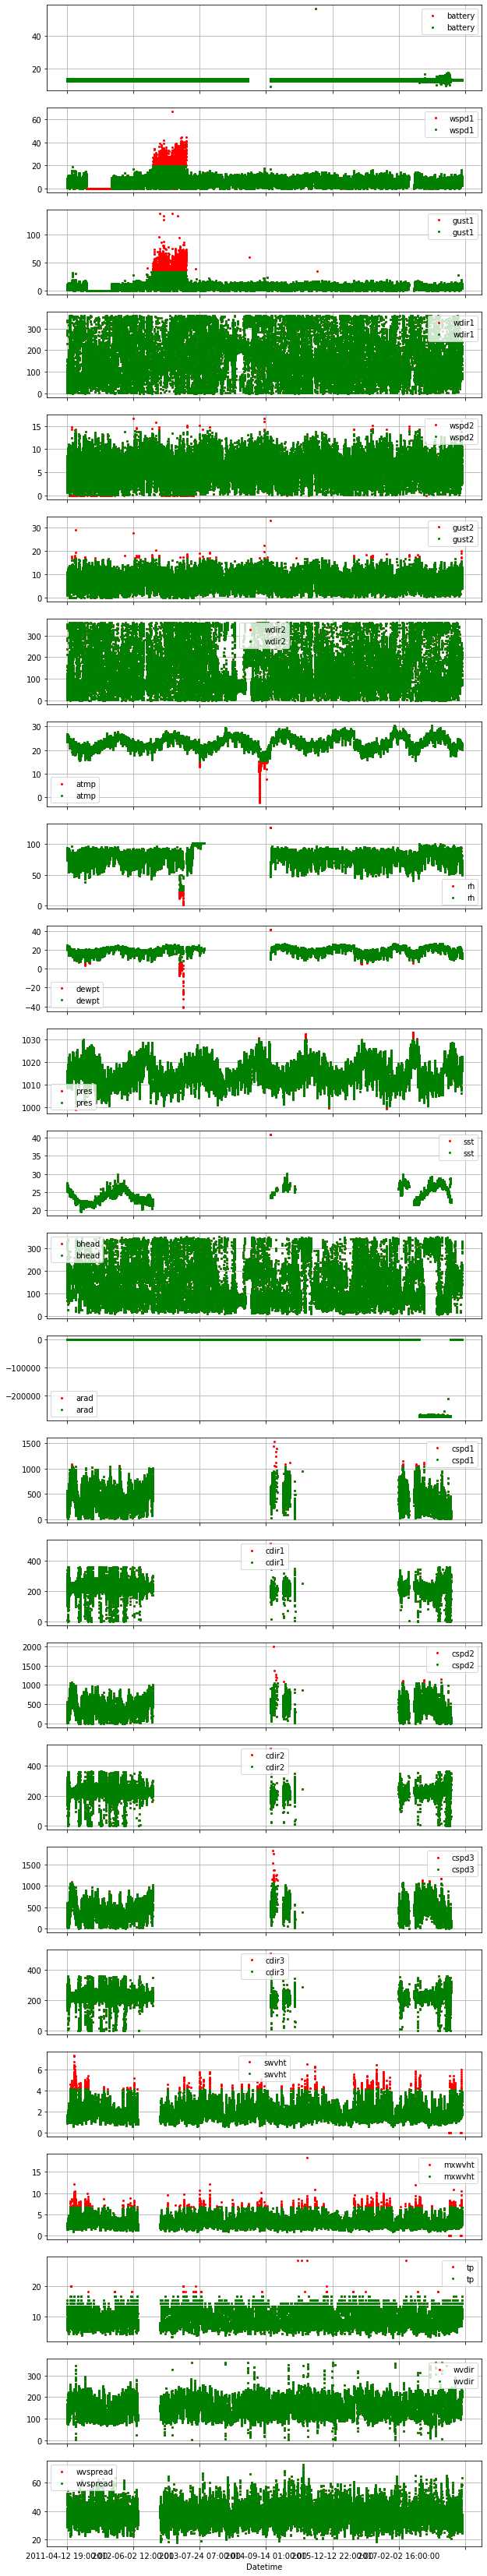

In [27]:
buoy = 'santos'
params_raw = buoys_df_raw.loc[buoy].columns
fig, ax = plt.subplots(len(params_raw),1,sharex=True,figsize=(10,60))
buoys_df_raw.loc[buoy,params_raw].plot(subplots=True,color='r',marker='.',linestyle='none',ms=4,grid=True,ax=ax);
santos.plot(subplots=True,color='g',marker='.',linestyle='none',ms=4,grid=True,ax=ax);